<a href="https://colab.research.google.com/github/UOS-COMP1201/code/blob/main/z3-independent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install z3-solver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import itertools
import z3 

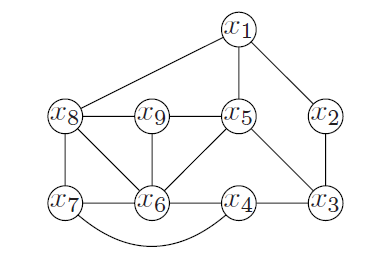

The input is a description of the graph. First line has a number denoting the number of nodes. 

Then each pair of numbers denotes an edge.
Note that we assume that the nodes are numbered from 0 to n-1

In [ ]:
## the desciption of the graph in the above figure
n=9
edges=[(0,1),(0, 4),(0,7),(1,2),(2,3),(2,4),(3,5),(3,6),(4,5),
(4,8),(5,6),(5,7),(5,8),(6,7),(7,8)]

Next we create the z3 variables. In this exercise we are looking for an independent
set of size 4 (variable k)

In [ ]:

vars=[None]*n
# create variables while making sure that we start with 1 instead of 0
# to be compatible with the graph above
for i in range(0,n):
   vars[i]= z3.Bool("x"+str(i+1))
k=4
comb=n-k+1

We create the solver and add the clauses: all combinations of 4 variables with
the constraint that no two variables representing connected nodes can be true
at the same time

In [ ]:

solver=z3.Solver()
for c in itertools.combinations(vars,comb):
   solver.add(z3.Or(c))
for (s,e) in edges:
   solver.add(z3.Or(z3.Not(vars[s]),z3.Not(vars[e])))


Collect and print the results.

In [ ]:
if(solver.check()==z3.sat):
    print("Found an IS of size {}".format(k))
    m=solver.model()
    for d in m.decls():
        if(m[d]==True):
            print(d.name())

else:
   print("No IS of size {} exits".format(k))


Found an IS of size 4
x2
x4
x5
x8


### Other solutions

- Is there another IS? 
- If so how can we find it?
- Can be done by adding a constraint to ignore on vertex in the previous solution
- e.g. x2 (i.e., var[1])

In [ ]:

solver=z3.Solver()
for c in itertools.combinations(vars,comb):
   solver.add(z3.Or(c))
for (s,e) in edges:
   solver.add(z3.Or(z3.Not(vars[s]),z3.Not(vars[e])))

# the blow is added to force x2 NOT to be in the solution
solver.add(z3.Not(vars[1]))

In [ ]:
if(solver.check()==z3.sat):
    print("Found an IS of size {}".format(k))
    m=solver.model()
    for d in m.decls():
        if(m[d]==True):
            print(d.name())

else:
   print("No IS of size {} exits".format(k))


Found an IS of size 4
x1
x7
x3
x9
